In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.drop(columns=['Loan_ID'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [10]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [12]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

We can see that there is data imbalance, let us use SMOTE() later and balance the data.

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Univariate Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64


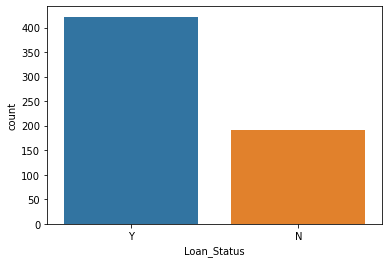

In [14]:
print(df["Loan_Status"].value_counts())
sns.countplot(df["Loan_Status"])
plt.show()

The count of "Y" is more when compared to "N" that means total 422 applicants got the loan and only 192 applicants did not.

Male      502
Female    112
Name: Gender, dtype: int64


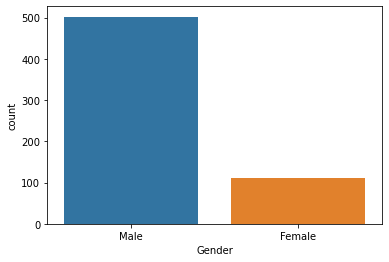

In [15]:
print(df["Gender"].value_counts())
sns.countplot(df["Gender"])
plt.show()

From the above graph we can observe that there are many Male applicants than Female applicants.

Yes    401
No     213
Name: Married, dtype: int64


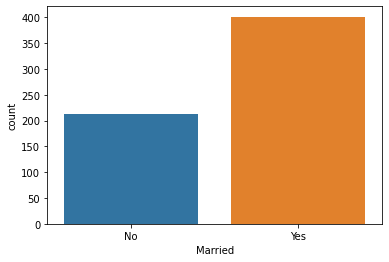

In [16]:
print(df["Married"].value_counts())
sns.countplot(df["Married"])
plt.show()

From the above graph we can observe that many Married couples apply for a loan when compared to Singles

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


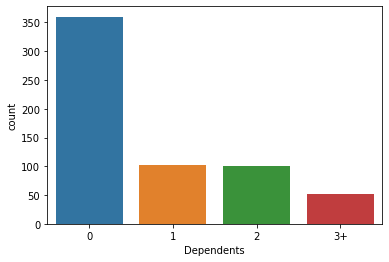

In [17]:
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

Most of the applicants do not have any dependants.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


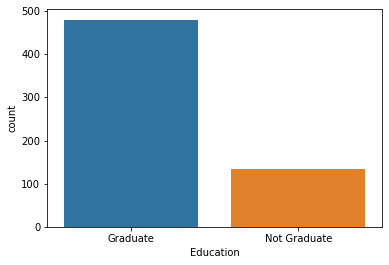

In [18]:
print(df["Education"].value_counts())
sns.countplot(df["Education"])
plt.show()

The number of Graduates applying for a loan are more when compared to Not a Graduate.

No     532
Yes     82
Name: Self_Employed, dtype: int64


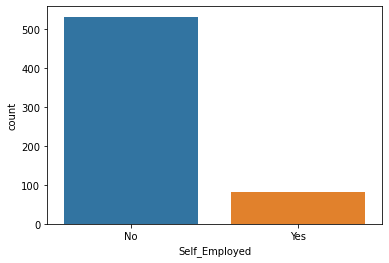

In [19]:
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"])
plt.show()

There are 82 applicants who are self employed and have applied for a loan.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


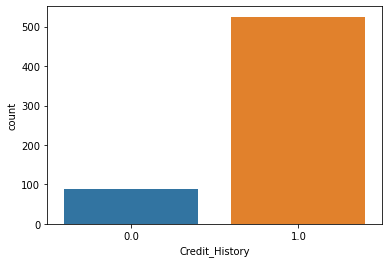

In [20]:
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()

# Distribution of Skewness

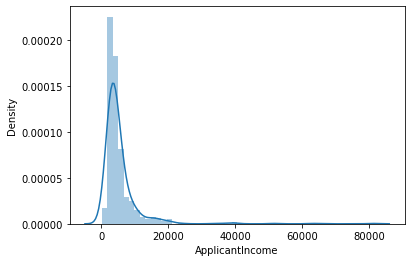

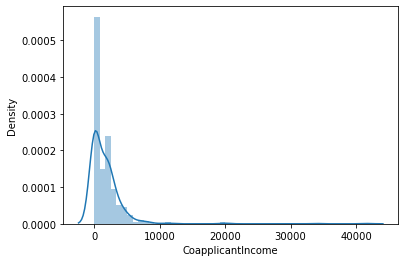

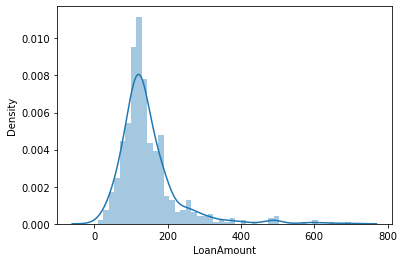

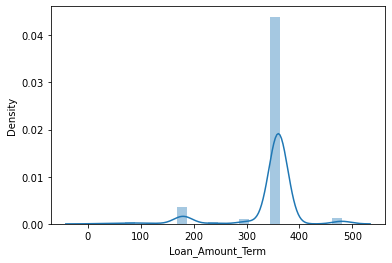

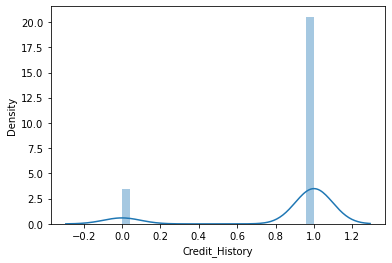

In [21]:
columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in columns:
    sns.distplot(df[i])
    plt.show()

# Bivariate Analysis

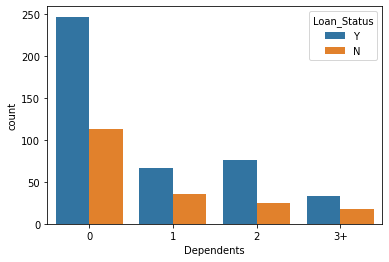

In [22]:
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

The count of people who have 0 dependants and applying for a loan is the highest followed by 2 dependant, 1 dependant and then 3+ dependants.

No     532
Yes     82
Name: Self_Employed, dtype: int64


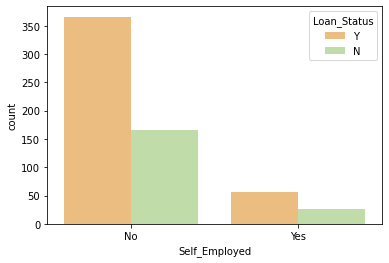

In [23]:
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"],palette="Spectral")
plt.show()

1. Most of the applicants are not self employed and only few of the applicants are self employed.\
2. The applicants who are not self employed have the tendency of getting a loans than self employed applicants.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


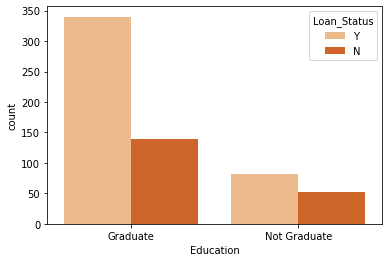

In [24]:
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"],palette="Oranges")
plt.show()

Most of the applicants who have applied for a loan are graduated and only few are not graduated. Also the applicants have a tendency of getting loans rather than who are not. 

1.0    525
0.0     89
Name: Credit_History, dtype: int64


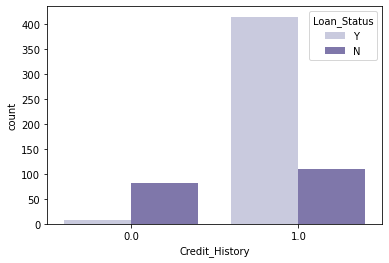

In [25]:
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"], hue=df["Loan_Status"],palette="Purples")
plt.show()

People who have a credit history score of 1 have got a loan and most people with a credit score of 0 have not got a loan.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


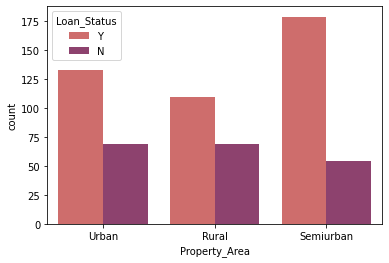

In [26]:
print(df["Property_Area"].value_counts())
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="flare")
plt.show()

Most of the applicants from the Semiurban region have applied for loan followed by Urban area.The semiurban and urban area people they have more chances of getting their loan approval.

Yes    401
No     213
Name: Married, dtype: int64


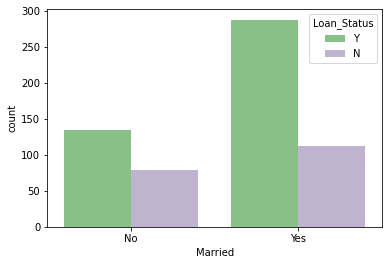

In [27]:
print(df["Married"].value_counts())
sns.countplot(df["Married"],hue=df["Loan_Status"],palette="Accent")
plt.show()

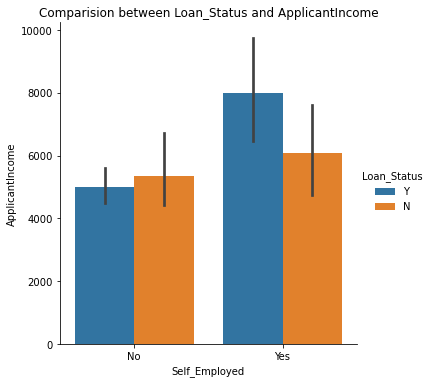

In [28]:
sns.catplot(x='Self_Employed',y="ApplicantIncome",data=df,kind="bar",hue='Loan_Status',)
plt.title("Comparision between Loan_Status and ApplicantIncome")
plt.show()

The applicants whose loans got approved have high average income and are self employed

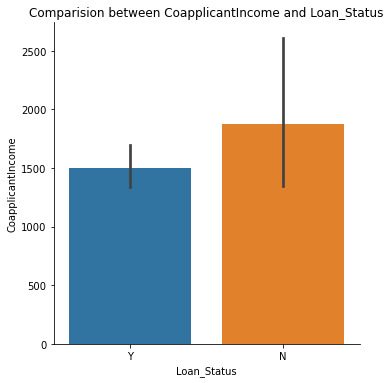

In [29]:
sns.catplot(x='Loan_Status',y="CoapplicantIncome",data=df,kind="bar")
plt.title("Comparision between CoapplicantIncome and Loan_Status")
plt.show()

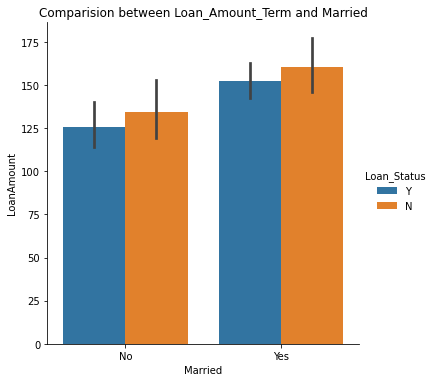

In [30]:
sns.catplot(x="Married",y='LoanAmount',data=df,kind="bar",hue="Loan_Status")
plt.title("Comparision between Loan_Amount_Term and Married")
plt.show()

The applicants who got married and have average loan amount have more tendency of getting loan.

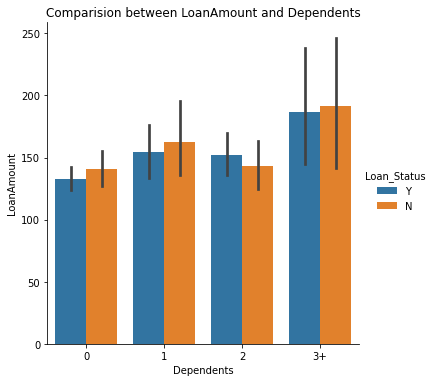

In [31]:
sns.catplot(x='Dependents',y="LoanAmount",data=df,kind="bar",hue="Loan_Status")
plt.title("Comparision between LoanAmount and Dependents")
plt.show()

The applicants who have more than 3 dependents with average loan amount have got thier loan approved.

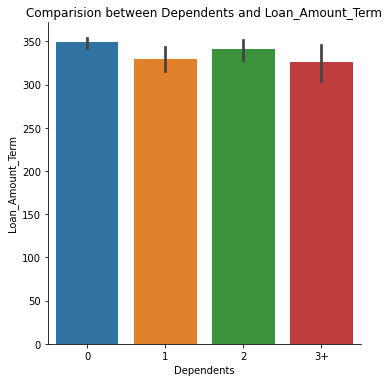

In [32]:
sns.catplot(x="Dependents",y='Loan_Amount_Term',data=df,kind="bar")
plt.title("Comparision between Dependents and Loan_Amount_Term")
plt.show()

The applicants 0 dependents have high Loan amount term

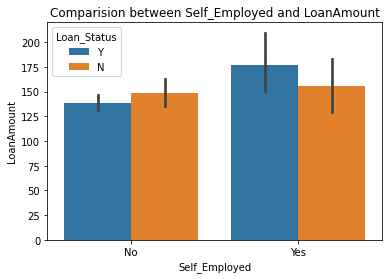

In [33]:
sns.barplot(x="Self_Employed",y="LoanAmount",data=df,hue="Loan_Status")
plt.title("Comparision between Self_Employed and LoanAmount")
plt.show()

1. The average loan amount by the self employed is higher when compared to the other.
2. The loan approval for self employed applicants with avarage loan amount is high compare to the applicants who are not self employed.

# Multivariate Analysis

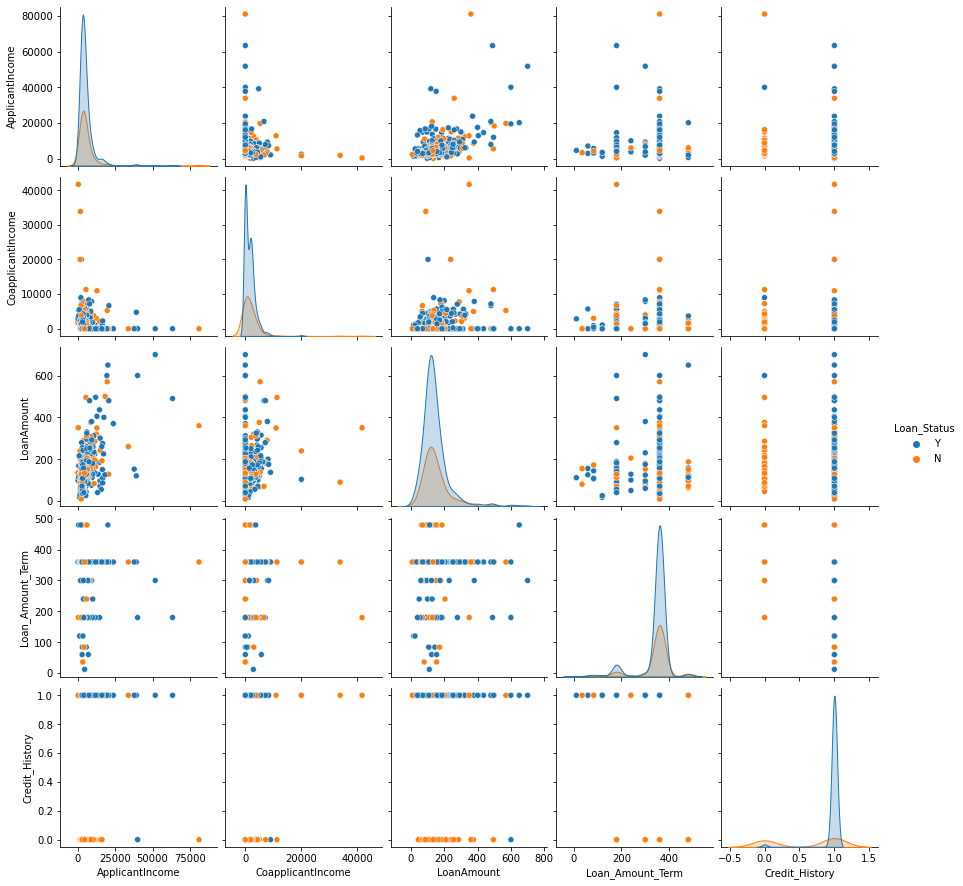

In [34]:
sns.pairplot(df,hue="Loan_Status")

# Outliers

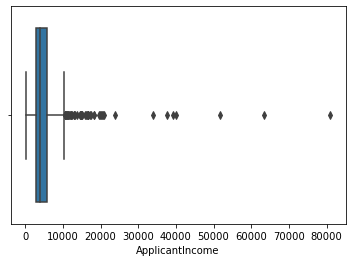

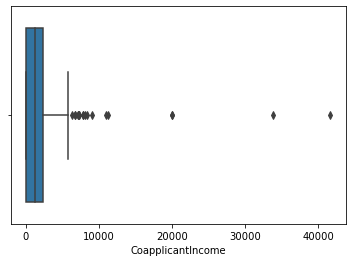

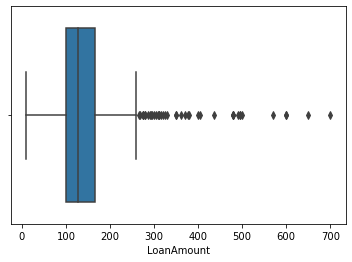

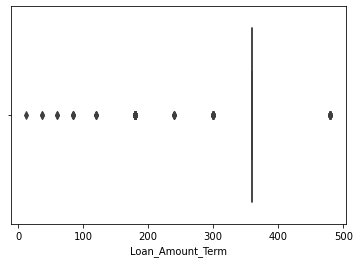

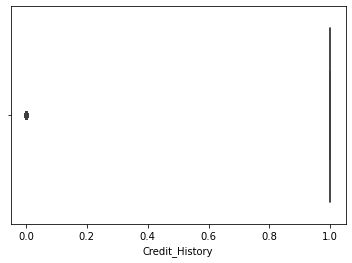

In [35]:
for i in columns:
    sns.boxplot(df[i])
    plt.show()

# Removing Outliers using Zscore

In [36]:
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]
from scipy.stats import zscore
z=np.abs(zscore(features))
z

array([[0.07299082, 0.55448733, 0.21124125, 0.2732313 ],
       [0.13441195, 0.03873155, 0.21124125, 0.2732313 ],
       [0.39374734, 0.55448733, 0.94899647, 0.2732313 ],
       ...,
       [0.43717437, 0.47240418, 1.27616847, 0.2732313 ],
       [0.35706382, 0.55448733, 0.49081614, 0.2732313 ],
       [0.13441195, 0.55448733, 0.15174486, 0.2732313 ]])

In [37]:
new_df = df[(z<3).all(axis=1)] 
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
df.shape, new_df.shape

((614, 12), (577, 12))

In [39]:
data_loss = (614-577)/614*100
data_loss

6.026058631921824

We have lost 6.02%(37 rows) data using Zscore

# Skewness

In [40]:
new_df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

Let's remove the skew using yeo-johnson method

In [41]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.681780,-1.122446,0.000771,0.130788
1,0.234783,0.744117,0.000771,0.130788
2,-0.527201,-1.122446,-1.437336,0.130788
3,-0.791972,0.895786,-0.153545,0.130788
4,0.728848,-1.122446,0.238260,0.130788


In [42]:
new_df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
dtype: float64

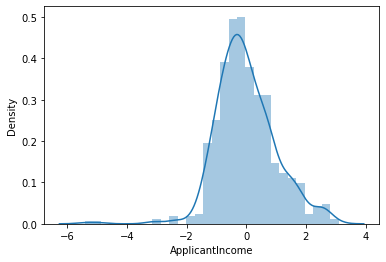

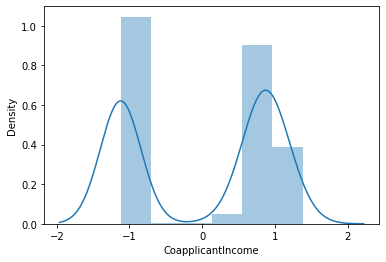

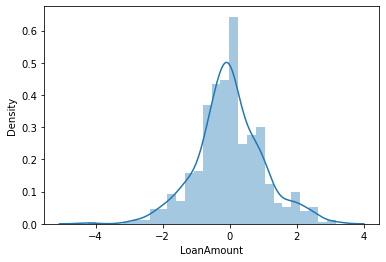

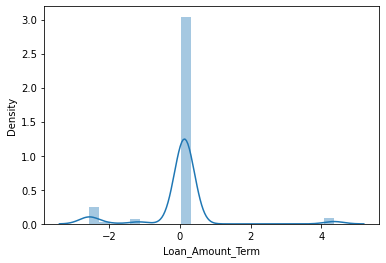

In [43]:
for i in skew:
    sns.distplot(new_df[i])
    plt.show()

# Label Encoding

In [44]:
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(lbl.fit_transform)
new_df[categorical_col].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


# Correlation

In [45]:
corr = new_df.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.098370,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.128399,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.078895,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.062494,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.052033,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.089402,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,-0.000281,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.021702,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.098370,-0.128399,-0.078895,-0.062494,-0.052033,-0.089402,-0.000281,0.021702,1.000000,-0.000146,-0.029931,-0.056610
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,-0.000146,1.000000,-0.008121,0.560936


<AxesSubplot:>

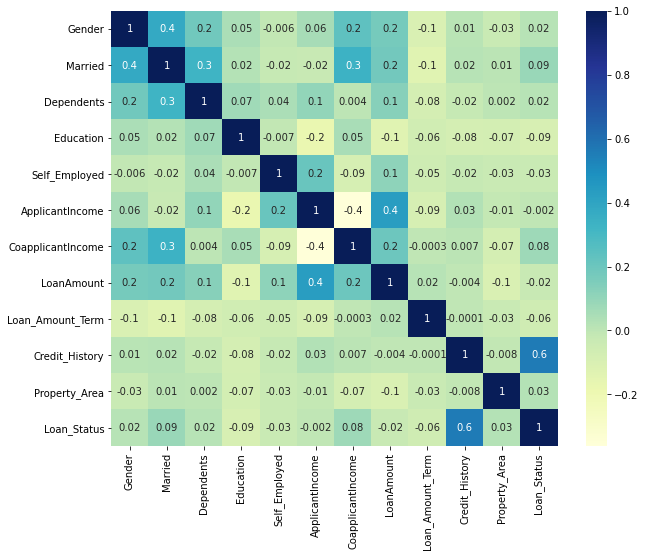

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(), fmt='.1g', annot = True,annot_kws={'size':10},cmap="YlGnBu")


From the above heatmap, we can observe the following:
1. The target column Loan_Status has the highest correlation with the Credit_History.
2. The other features have less correlation with the target column.
3. There is no muliticolinearlity prblem

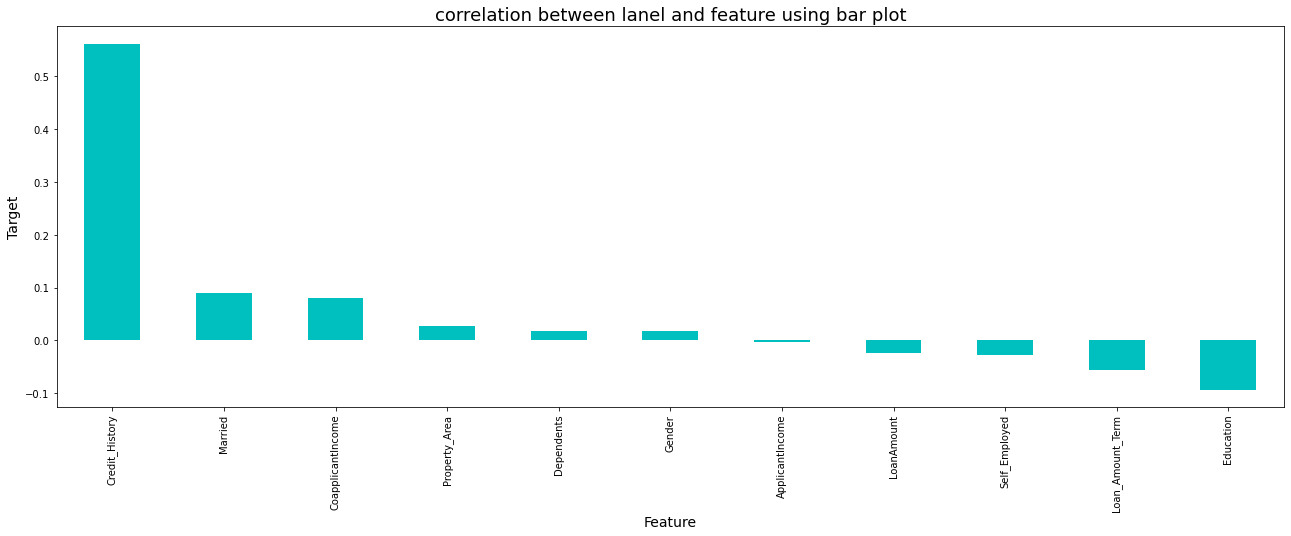

In [47]:
plt.figure(figsize=(22,7))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [48]:
x = new_df.drop("Loan_Status", axis=1)
y = new_df["Loan_Status"]

In [49]:
x.shape, y.shape

((577, 11), (577,))

# Standart Scaler

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.130788,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.130788,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.130788,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.130788,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.130788,0.418513,1.227472


In [51]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

# Oversampling

In [52]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [53]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

# Model Building

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

### Finding the Best Random State

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred = rfc.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," at Random_state ",maxRS)

Best accuracy is  0.8870292887029289  at Random_state  77


In [56]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state = maxRS)

# Logistic Regression

In [57]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predLR = lr.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7573221757322176
[[ 71  51]
 [  7 110]]
              precision    recall  f1-score   support

           0       0.91      0.58      0.71       122
           1       0.68      0.94      0.79       117

    accuracy                           0.76       239
   macro avg       0.80      0.76      0.75       239
weighted avg       0.80      0.76      0.75       239



Accuracy Score using Logistic Regression: 78.66%

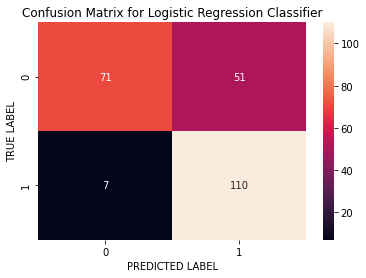

In [58]:
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

sns.heatmap(cm, annot = True, fmt = ".0f", xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Decision Tree Classifier

In [59]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predDTC = dtc.predict(x_test)
print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7364016736401674
[[96 26]
 [37 80]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       122
           1       0.75      0.68      0.72       117

    accuracy                           0.74       239
   macro avg       0.74      0.74      0.74       239
weighted avg       0.74      0.74      0.74       239



Accuracy Score using DTC: 80.33%

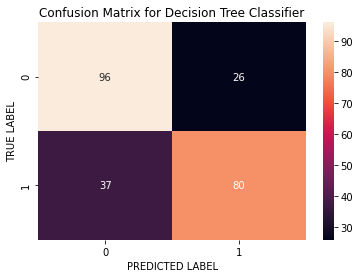

In [60]:
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifier
         

In [61]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predRFC = rfc.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8786610878661087
[[105  17]
 [ 12 105]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       122
           1       0.86      0.90      0.88       117

    accuracy                           0.88       239
   macro avg       0.88      0.88      0.88       239
weighted avg       0.88      0.88      0.88       239



Accuracy Score using Random Forest: 86.61%

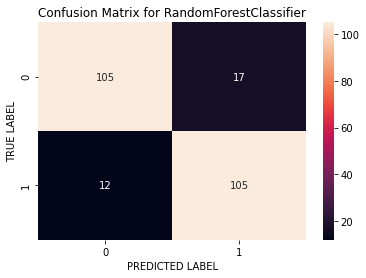

In [62]:
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Support Vector Classifier

In [63]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7656903765690377
[[ 80  42]
 [ 14 103]]
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       122
           1       0.71      0.88      0.79       117

    accuracy                           0.77       239
   macro avg       0.78      0.77      0.76       239
weighted avg       0.78      0.77      0.76       239



Accuracy Score using SVC: 79.07%

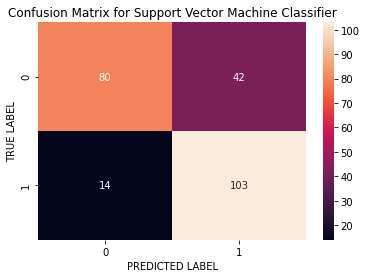

In [64]:
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# KNN Classifier

In [65]:
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.7907949790794979
[[98 24]
 [26 91]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       122
           1       0.79      0.78      0.78       117

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



Accuracy Score using KNN Classifier: 79.49%

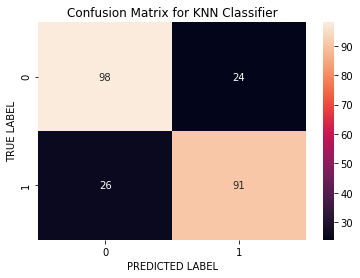

In [66]:
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Gradient Boosting Classifier

In [67]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predGB = gb.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.7698744769874477
[[87 35]
 [20 97]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       122
           1       0.73      0.83      0.78       117

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239



Accuracy Score using Gradient Boosting: 84.10%

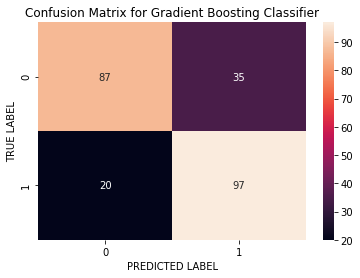

In [68]:
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# AdaBoost Classifier

In [69]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
predABC = abc.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.7782426778242678
[[ 86  36]
 [ 17 100]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       122
           1       0.74      0.85      0.79       117

    accuracy                           0.78       239
   macro avg       0.79      0.78      0.78       239
weighted avg       0.79      0.78      0.78       239



Accuracy Score using AdaBoost: 81.17%

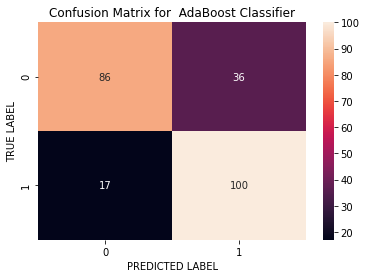

In [70]:
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

# GaussianNB Classifier


In [71]:
nb = GaussianNB()
nb.fit(x_train,y_train)
predNB = nb.predict(x_test)
print(accuracy_score(y_test, predNB))
print(confusion_matrix(y_test, predNB))
print(classification_report(y_test,predNB))

0.7615062761506276
[[ 67  55]
 [  2 115]]
              precision    recall  f1-score   support

           0       0.97      0.55      0.70       122
           1       0.68      0.98      0.80       117

    accuracy                           0.76       239
   macro avg       0.82      0.77      0.75       239
weighted avg       0.83      0.76      0.75       239



Accuracy Score GaussianNB: 77.82%

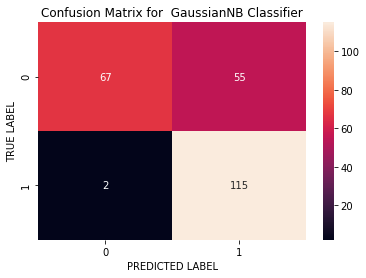

In [72]:
cm = confusion_matrix(y_test,predNB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

sns.heatmap(cm, annot = True, fmt = ".0f",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  GaussianNB Classifier')
plt.show()

# Cross Validation Score

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
print("Cross_Validation_Score using Linear Regression:",cross_val_score(lr,x,y,cv=5).mean())

Cross_Validation_Score using Linear Regression: 0.7148427672955975


In [75]:
print("Cross_Validation_Score using Decision Tree Classifier:",cross_val_score(dtc,x,y,cv=5).mean())

Cross_Validation_Score using Decision Tree Classifier: 0.7626179245283019


In [76]:
print("Cross_Validation_Score using Random Forest Clasifier:",cross_val_score(rfc,x,y,cv=5).mean())

Cross_Validation_Score using Random Forest Clasifier: 0.8392610062893082


In [77]:
print("Cross_Validation_Score using Support Vectos Classifier:",cross_val_score(svc,x,y,cv=5).mean())

Cross_Validation_Score using Support Vectos Classifier: 0.7249292452830188


In [78]:
print("Cross_Validation_Score using KNN Classifier:",cross_val_score(knn,x,y,cv=5).mean())

Cross_Validation_Score using KNN Classifier: 0.7311713836477988


In [79]:
print("Cross_Validation_Score using Gradient Boosting Classifier:",cross_val_score(gb,x,y,cv=5).mean())

Cross_Validation_Score using Gradient Boosting Classifier: 0.7752122641509435


In [80]:
print("Cross_Validation_Score using AdaBoost Classifier:",cross_val_score(abc,x,y,cv=5).mean())

Cross_Validation_Score using AdaBoost Classifier: 0.7412971698113209


In [81]:
print("Cross_Validation_Score using GaussianNB Classifier:",cross_val_score(nb,x,y,cv=5).mean())

Cross_Validation_Score using GaussianNB Classifier: 0.718632075471698


### Best Model :Random Forest Classifier

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameters = {'criterion':['gini', 'entropy'],
              'max_depth':[1,3,5,7],
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators': [100]
             }
              

In [84]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [85]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 100}

In [86]:
loan_status = RandomForestClassifier (criterion='entropy', max_depth=7, max_features='sqrt', n_estimators=100)
loan_status.fit(x_train, y_train)
pred = loan_status.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

80.75313807531381


We get Accuracy of 84.51% after Hyperparameter Tuning

# Saving the model

In [87]:
import pickle
filename = 'loan_status.pkl'
pickle.dump(rfc,open(filename,"wb"))

# ROC AUC Curve

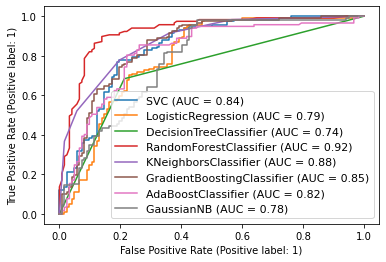

In [90]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(svc,x_test,y_test)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(rfc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax=disp.ax_)
plot_roc_curve(abc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(nb, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

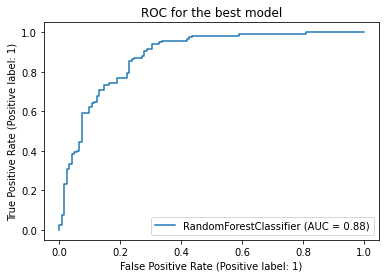

In [92]:
plot_roc_curve(loan_status, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# Prediction Results

In [88]:
import numpy as np
a = np.array(y_test)
predicted = np.array(rfc.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
234,0,0
235,0,0
236,0,0
237,1,1
